In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 행(row) 다 보기
pd.set_option('display.max_rows', None)

# 열(column) 다 보기
pd.set_option('display.max_columns', None)

In [2]:
from PublicDataReader import Ecos
service_key = "2G5XUDEN750MGRZM37GF"
api = Ecos(service_key)
df = api.get_statistic_table_list()
df.head()

,상위통계표코드,통계표코드,통계명,시점,검색가능여부,출처
0,*,0000000001,1. 통화/금융,None,N,None
1,0000000001,0000000002,1.1. 통화/유동성,None,N,None
2,0000000002,0000000003,1.1.1. 본원통화,None,N,None
3,0000000003,0000000004,1.1.1.1. 본원통화 구성내역,None,N,None
4,0000000004,102Y004,"1.1.1.1.1. 본원통화 구성내역(평잔, 계절조정계열)",M,Y,None


### 기업 및 소비자수심리지수

- 실적
- 전망 : 수출은 제외하고 나머지는 10월에 떨어졌음. 따라 투자/채용 위축 가능성

📌 왜 기업이 먼저 느끼나?
- 선행적 지표 특성
    + 기업은 원자재 가격, 환율, 수출 주문, 금융 비용(금리) 같은 걸 가장 먼저 접해요.
    + 보니 경기 하강/상승 신호를 먼저 느끼고 투자·고용 조정을 빨리 시작함.
	- 소비자는 후행적
	+ 소비자는 “소득”, “고용 안정성”, “체감 물가”를 보고 반응하는데,
	+ 이건 기업이 먼저 조정한 결과가 시간이 지나서야 영향을 줍니다.
	+ 예) 기업이 투자를 줄임 → 고용/임금 둔화 → 가계 소득 악화 → 소비 위축.


🔄 실제 사이클 예시
- 경기 하강 국면: 기업 → 주문 줄어듦, 투자 축소 → 고용 둔화 → 소비자 체감 경기 악화
- 회복 국면: 기업 → 신규 투자, 고용 확대 → 소득 개선 → 소비자 체감 경기 개선

즉, 기업 체감경기가 선행, 소비자 체감경기는 후행이라고 보는 게 일반적이에요.

In [3]:
df_biz_survey = api.get_statistic_search(통계표코드="512Y013", 주기="M", 검색시작일자="202501", 검색종료일자="202509")
list_biz = df_biz_survey['통계항목명1'].unique().tolist()
for biz in list_biz:
    if biz in ['제조업']:
        df_biz_tmp = df_biz_survey[df_biz_survey['통계항목명1'] == biz].copy()
        df_biz_pivot = pd.pivot(data=df_biz_tmp, index='시점',columns='통계항목명2', values='값')
        print("="*50)
        print(f"📊 업종: {biz}")
        display(df_biz_pivot)  # 주피터노트북이라면 print 대신 display 추천

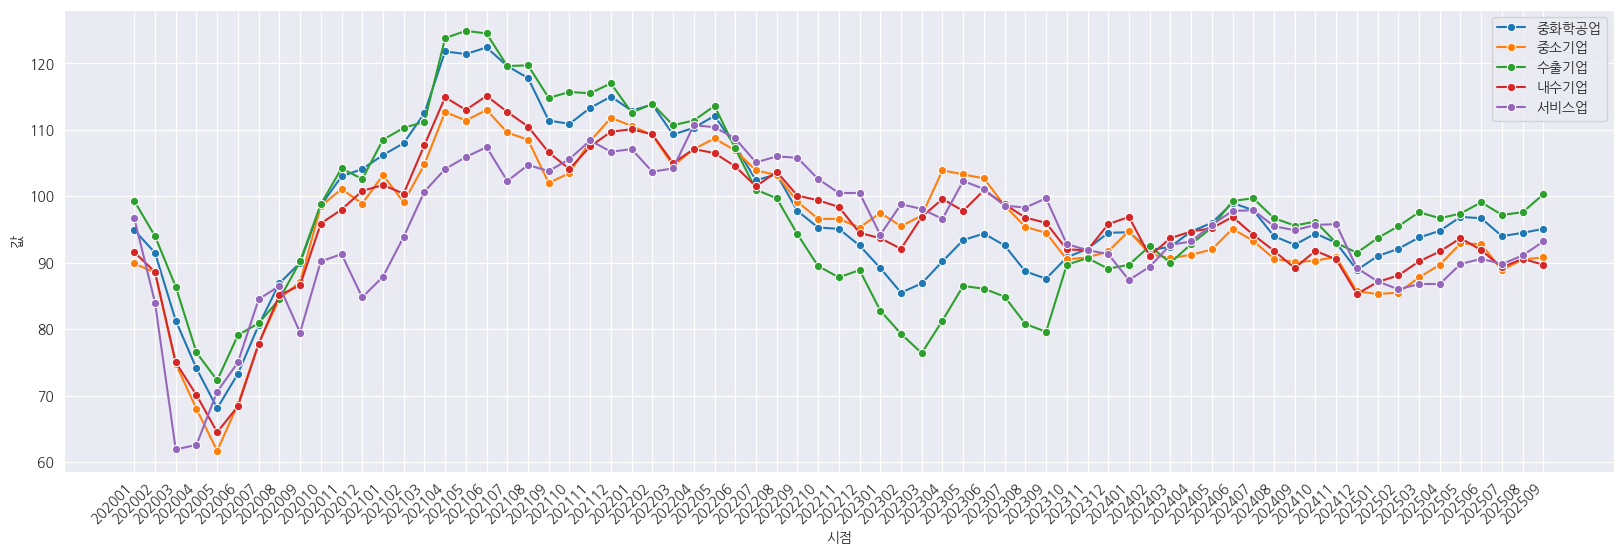

In [4]:
df_biz_survey = api.get_statistic_search(통계표코드="512Y013", 주기="M", 검색시작일자="202001", 검색종료일자="202509")
df_biz_survey = df_biz_survey[(df_biz_survey['통계항목명2'] == '기업심리지수실적') & (df_biz_survey['통계항목명1'].isin(['제조업', '수출기업', '내수기업', '서비스업', '중화학공업', '중소기업', '대기업']))]
df_biz_survey['값'] = df_biz_survey['값'].astype(float)
plt.figure(figsize=(20,6))  # 그림 넓게
sns.lineplot(data=df_biz_survey, x = '시점', y='값', hue = '통계항목명1', marker='o')

plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

In [5]:
df_biz_pred = api.get_statistic_search(통계표코드="512Y014", 주기="M", 검색시작일자="202509", 검색종료일자="202510")
pd.pivot(data=df_biz_pred[df_biz_pred['통계항목명2'] == '기업심리지수전망'], index='통계항목명1', columns='시점', values='값')

시점,202509,202510
통계항목명1,,
경 공 업,88.9,83.2
내수기업,90.5,85.6
대 기 업,95.4,92.4
비제조업,91.5,87.9
서비스업,92.8,90.3
수출기업,95.9,96.2
전 산 업,91.8,88.5
제 조 업,92.1,89.4
중소기업,88.7,85.8


### 소비자동향지수
- 전망

In [6]:
df_cus_survey = api.get_statistic_search(통계표코드="511Y002", 주기="M", 검색시작일자="202501", 검색종료일자="202510")
pd.pivot(data=df_cus_survey[ (df_cus_survey['통계항목명2'] == '전체')], index='시점', columns='통계항목명1', values='값')

통계항목명1,가계부채전망CSI,가계수입전망CSI,가계저축전망CSI,교양·오락·문화생활비 지출전망CSI,교육비 지출전망CSI,교통비 및 통신비 지출전망CSI,금리수준전망CSI,내구재 지출전망CSI,물가수준전망(1년후)CSI,생활형편전망CSI,소비자심리지수,소비지출전망CSI,여행비 지출전망CSI,외식비 지출전망CSI,의료·보건비 지출전망CSI,의류비 지출전망CSI,임금수준전망CSI,주거비 지출전망CSI,주택가격전망CSI,취업기회전망CSI,향후경기전망CSI,현재가계부채CSI,현재가계저축CSI,현재경기판단CSI,현재생활형편CSI
시점,,,,,,,,,,,,,,,,,,,,,,,,,
202501,98,96,95,87,100,106,97,90,151,89,91.2,103,88,89,110,91,118,104,101,69,65,100,93,51,87
202502,97,97,97,90,100,108,99,91,149,93,95.2,106,91,91,111,92,118,104,99,74,73,99,93,55,87
202503,99,96,96,88,100,106,92,91,149,92,93.4,104,91,91,110,93,117,104,105,72,70,100,93,55,87
202504,98,96,96,89,99,106,96,91,149,92,93.8,105,92,92,110,94,118,104,108,76,73,100,91,52,87
202505,97,99,98,92,99,106,93,94,145,97,101.8,108,95,94,111,95,120,104,111,88,91,98,93,63,90
202506,97,102,100,94,99,106,87,95,140,101,108.7,110,99,97,111,96,124,103,120,100,107,99,96,74,92
202507,96,102,101,95,99,107,95,96,143,101,110.8,111,99,98,111,98,124,104,109,98,106,99,97,86,94
202508,97,102,101,94,100,107,95,96,145,101,111.4,111,98,99,111,97,123,104,111,92,100,99,97,93,96
202509,97,102,100,94,99,106,93,96,145,100,110.1,110,97,97,111,98,122,104,112,91,97,99,97,91,96


해당하는 데이터가 없습니다.
